# Automobile Dataset EDA

I will perform a simple EDA of the automobile dataset, than create a classification task in which 

In [98]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd   
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import seaborn as sns

automobile = fetch_ucirepo(id=10) 
X = automobile.data.features 
y = automobile.data.targets 

In [99]:
# create a DataFrame for features
df_features = pd.DataFrame(X, columns=automobile.feature_names)

# create a DataFrame for targets
df_targets = pd.DataFrame(y, columns=['symboling'])

# concatenate features and targets horizontally
df = pd.concat([df_features, df_targets], axis=1)
nRow, nCol = df.shape

df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


## Explanation of features:

| **Feature**         | **Description**                                                                                                          |
|---------------------|----------------------------------------------------------------------------------------------------------------------|
| **price**           | Price represents the monetary value assigned to a vehicle.                                  |
| **highway-mpg**     | Highway MPG represents a vehicle's estimated fuel efficiency during highway or freeway driving conditions, providing an indicator of fuel economy at higher speeds.         |
| **city-mpg**        | City MPG represents a vehicle's estimated fuel efficiency during urban driving conditions, considering stop-and-go traffic and frequent acceleration and deceleration.      |
| **peak-rpm**        | Peak RPM (Revolutions Per Minute) is the maximum rotational speed of an engine's crankshaft, indicating the engine's performance capabilities.                               |
| **horsepower**      | Horsepower is a measure of an engine's power output, indicating the ability to perform work, with higher values generally associated with increased performance.              |
| **compression-ratio**   | The compression ratio of an internal combustion engine is the ratio of the volume of the cylinder at its largest capacity (when the piston is at the bottom of its stroke) to the volume at its smallest capacity (when the piston is at the top of its stroke). It plays a critical role in engine efficiency and performance. |
| **stroke**          | In an internal combustion engine, the stroke is the distance the piston travels inside the cylinder, affecting engine performance and efficiency.                                  |
| **bore**            | Bore refers to the diameter of the cylinder in an engine, influencing the overall engine displacement and combustion characteristics.                                          |
| **fuel-system**     | The fuel system is responsible for storing, managing, and delivering fuel to the engine, crucial for proper combustion and overall engine operation.                             |
| **engine-size**     | Engine size refers to the total volume of all cylinders in the engine, influencing power and performance.                                                                         |
| **num-of-cylinders**    | Num of cylinders indicates the total number of cylinders in the engine, influencing power delivery and overall engine characteristics.                                          |
| **engine-type**     | Engine type denotes the overall configuration and layout of the engine, influencing performance characteristics.                         |
| **curb-weight**     | Curb weight represents the total weight of a vehicle with all standard equipment and fluids, excluding passengers and cargo. It impacts a vehicle's handling and fuel efficiency. |
| **height**          | Height is the vertical measurement of a vehicle, influencing its overall appearance and, to some extent, its aerodynamics.                                                     |
| **width**           | Width is the horizontal measurement of a vehicle, impacting its stability and interior space.                                                                                    |
| **length**          | Length is the measurement of a vehicle from front to back, influencing its overall size and available interior space.                                                            |
| **wheel-base**      | The wheelbase is the distance between the front and rear axles of a vehicle, affecting stability, ride comfort, and handling characteristics.                                 |
| **engine-location** | Engine location indicates whether the engine is located at the front, rear, or mid of the vehicle, influencing weight distribution and handling.                                |
| **drive-wheels**    | Drive wheels indicate which set of wheels (front, rear, or all) receive power from the engine, influencing a vehicle's traction and performance.                              |
| **body-style**      | Body style refers to the design and layout of a vehicle's exterior, such as sedan, coupe, convertible, etc. It contributes to the vehicle's aesthetics and functionality.       |
| **num-of-doors**    | Num of doors represents the total number of doors on a vehicle, influencing its accessibility and overall design.                                                                |
| **aspiration**      | Aspiration indicates whether an engine is naturally aspirated (normal) or turbocharged, affecting overall power and performance.                                              |
| **fuel-type**       | Fuel type denotes the type of fuel a vehicle uses, such as gasoline or diesel.                                                                                                   |
| **make**            | Make represents the brand or manufacturer of a vehicle.                                                                        |
| **normalized-losses**   | Normalized losses are a standardized measurement of insurance losses, helping assess the risk associated with insuring a particular vehicle model.                           |
| **symboling**       | Symboling is a numerical representation of the risk associated with insuring a vehicle, with negative values indicating higher risk and positive values indicating lower risk.  |


### As we can see the dataset consist of 205 rows and 26 columns. Some example features are: price, horsepower, insurance risk or fuel-type, basically everything you would expect of detailed datset about automobiles.


### Here are types of the data and missing values in each column:

In [100]:
df.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
symboling              int64
dtype: object

In [101]:
df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

#### As we can see there are some missing values inside the dataset that we need to handle.

### Handling the missing values

#### There are 7 features with missing or incorrect values. We need to handle each case individually:

In [102]:
df.replace('?', np.nan, inplace = True)

For features like "price","peak-rpm","horsepower","stroke","bore" and "normalized-losses" we decided to replace NaN-values with median as it was suitable for the data.. We do not have many observations and we want to keep as many as possible, so removing them would not be good option.

In [103]:
df["price"] = df["price"].fillna(df["price"].median())
df["peak-rpm"] = df["peak-rpm"].fillna(df["peak-rpm"].median())
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())
df["stroke"] = df["stroke"].fillna(df["stroke"].median())
df["bore"] = df["bore"].fillna(df["bore"].median())
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].median())

However, for feature "num-of-doors", it would not make too much sense to replace nan-values with mean or median, so we decided to remove them as we only had 2 missing values.

In [104]:
df = df.dropna(subset = ['num-of-doors'])

In [105]:
df.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64

Above, we can see that we have cleared our data set of missing values.

## 3. Methods and Algorithms:

### Descriptive Analysis and Data Visualization

### Summary statistics

In [106]:
df.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000
mean,13184.53202,30.699507,25.172414,5126.600985,104.374384,10.093202,3.254778,3.330542,127.073892,4.384236,2557.916256,53.731527,65.915271,174.11330,98.781281,3.123153,120.492611,0.837438
std,7909.62512,6.874645,6.529812,477.495294,39.623447,3.888216,0.314898,0.271343,41.797123,1.085525,522.557049,2.442526,2.150274,12.33909,6.040994,0.994841,31.901359,1.250021
min,5118.00000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.10000,86.600000,2.000000,65.000000,-2.000000
25%,7781.50000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.55000,94.500000,2.000000,101.000000,0.000000
50%,10295.00000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.20000,97.000000,4.000000,115.000000,1.000000
75%,16500.00000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.585000,143.000000,4.000000,2943.500000,55.500000,66.900000,183.30000,102.400000,4.000000,137.000000,2.000000
max,45400.00000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.10000,120.900000,4.000000,256.000000,3.000000


In [107]:
df.describe(include=object)

,fuel-system,engine-type,engine-location,drive-wheels,body-style,aspiration,fuel-type,make
count,203,203,203,203,203,203,203,203
unique,8,7,2,3,5,2,2,22
top,mpfi,ohc,front,fwd,sedan,std,gas,toyota
freq,93,146,200,118,94,167,184,32


### In this part we take a look at the boxplots and histograms to check if we have outliers. 

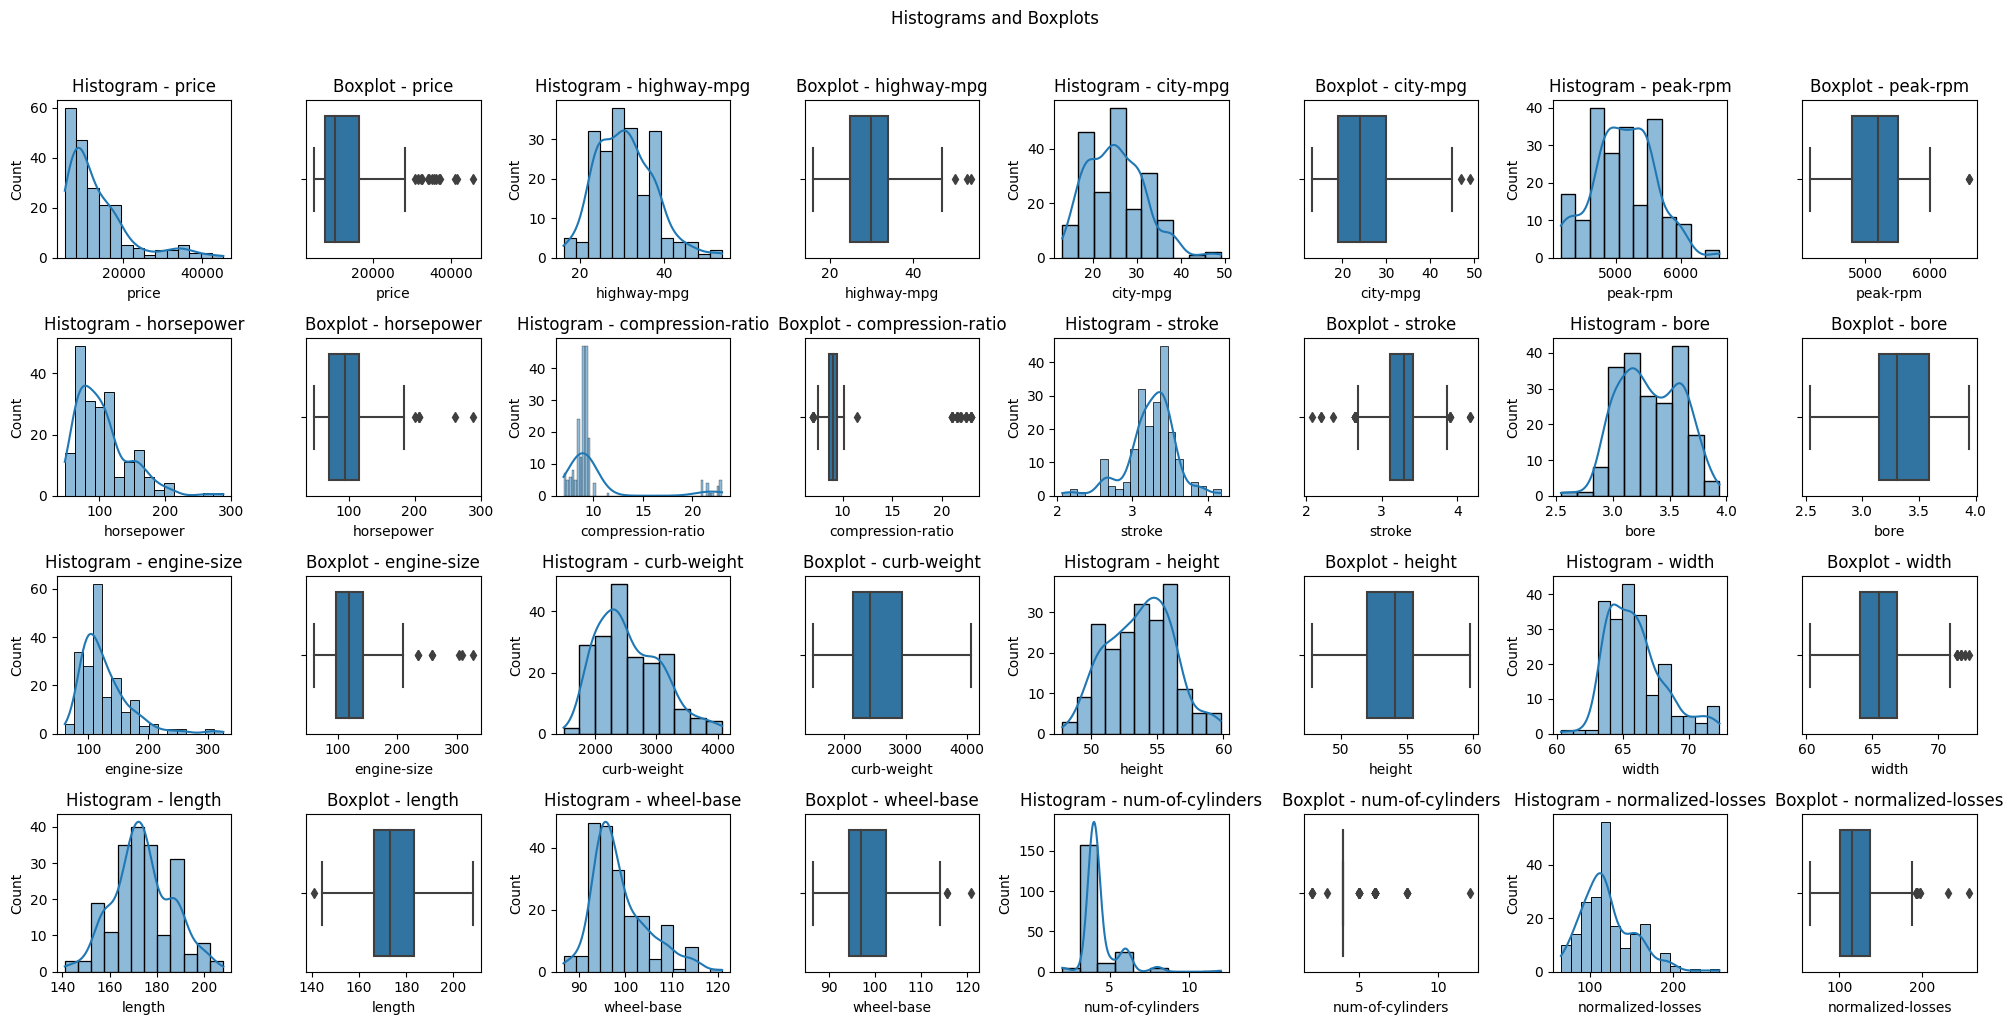

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

categories_to_plot = ["price","highway-mpg","city-mpg","peak-rpm","horsepower","compression-ratio","stroke","bore","engine-size","curb-weight","height","width","length","wheel-base","num-of-cylinders","normalized-losses"]


numerical_columns = df[categories_to_plot].select_dtypes(include=['float64', 'int64']).columns
num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols * 2, figsize=(20, 10))
fig.suptitle('Histograms and Boxplots', y=1.02)

for i, col in enumerate(numerical_columns):
    row_position, col_position = divmod(i, num_cols)

    sns.histplot(df[col], ax=axes[row_position, col_position * 2], kde=True)
    axes[row_position, col_position * 2].set_title('Histogram - {}'.format(col))

    sns.boxplot(x=df[col], ax=axes[row_position, col_position * 2 + 1])
    axes[row_position, col_position * 2 + 1].set_title('Boxplot - {}'.format(col))

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

As we can see, we have some outliers in certain features. Below, we handle them by removing observations using 3* IQR method (interquartile range). We remove values that are below Q1-3*IQR and above Q3+IQR. We chose to use this method as we dont want too remove to many observations. 

In [109]:
categories_outliers = ["price","highway-mpg","city-mpg","peak-rpm","horsepower","compression-ratio","stroke","engine-size"]


#handle outliers using 3 * IQR method
def handle_outliers(data, category):
    q1 = data[category].quantile(0.25)
    q3 = data[category].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr

    data = data[(data[category] >= lower_bound) & (data[category] <= upper_bound)]

    return data

for category in categories_outliers:
    df = handle_outliers(df, category)
df.shape

(177, 26)

As we can see, we removed 28 observations.

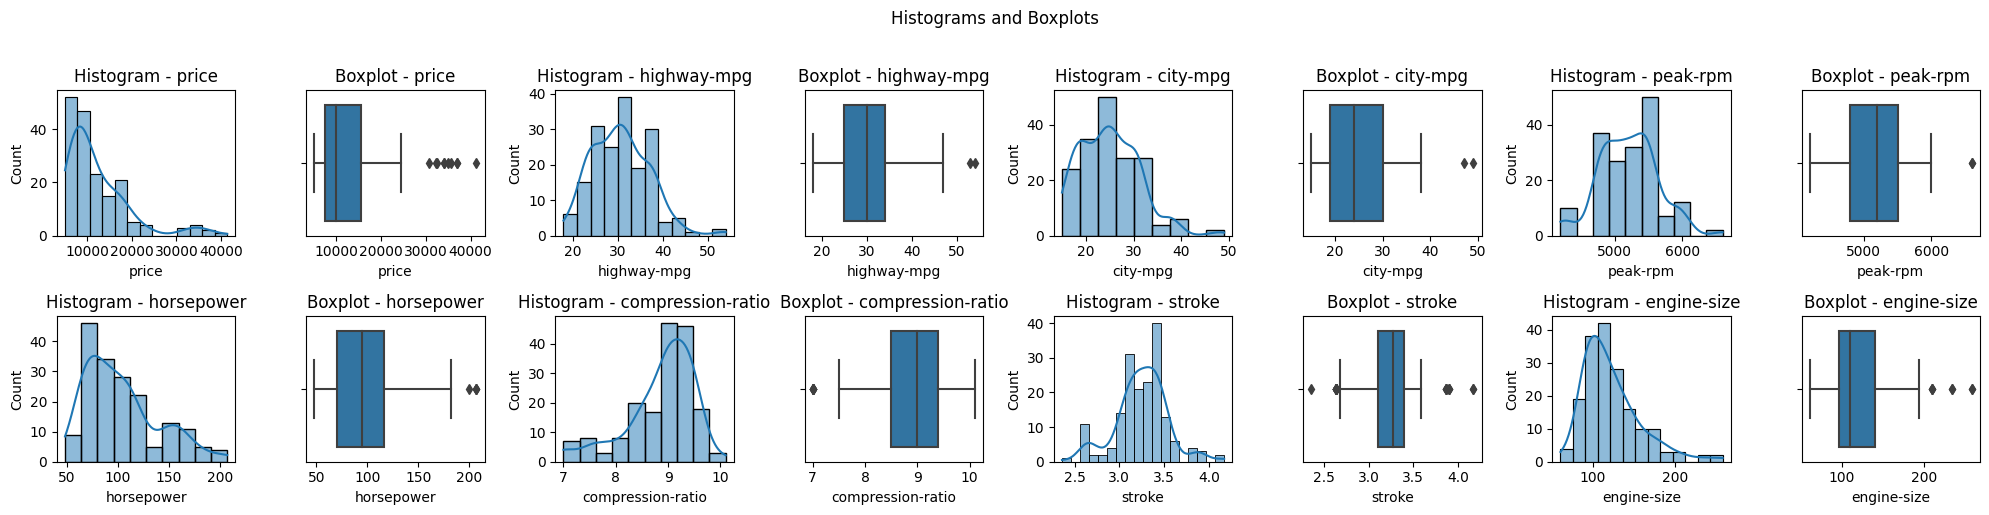

In [110]:
numerical_columns = df[categories_outliers].select_dtypes(include=['float64', 'int64']).columns
num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols * 2, figsize=(20, 5))
fig.suptitle('Histograms and Boxplots', y=1.02)

for i, col in enumerate(numerical_columns):
    row_position, col_position = divmod(i, num_cols)

    sns.histplot(df[col], ax=axes[row_position, col_position * 2], kde=True)
    axes[row_position, col_position * 2].set_title('Histogram - {}'.format(col))

    sns.boxplot(x=df[col], ax=axes[row_position, col_position * 2 + 1])
    axes[row_position, col_position * 2 + 1].set_title('Boxplot - {}'.format(col))

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

Above we see plots of the cleared data, as we can see we have less outliers.

## Correlation matrix

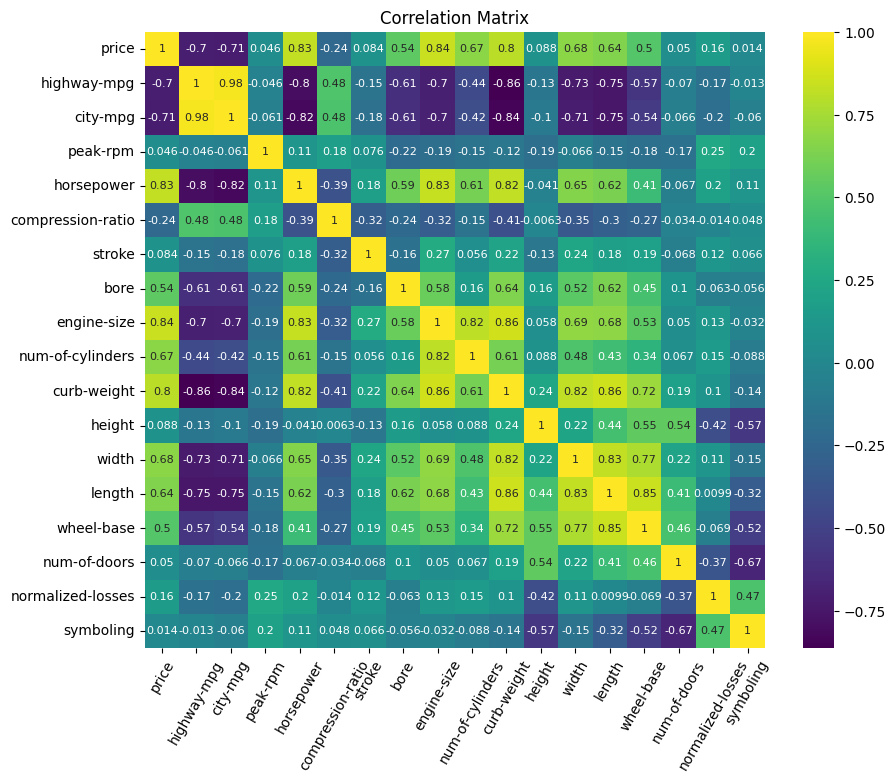

In [111]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', annot_kws={"size": 8})
plt.xticks(rotation=60)
plt.title('Correlation Matrix')
plt.show()

We see that most pairs have negative correlation, but we also have some values close to 1, for example number of cylinders and engine size - which is pretty obvious. Biggest correlation has pair of city-mpg and highway-mpg.

## Now we will take a look at non-numerical data.

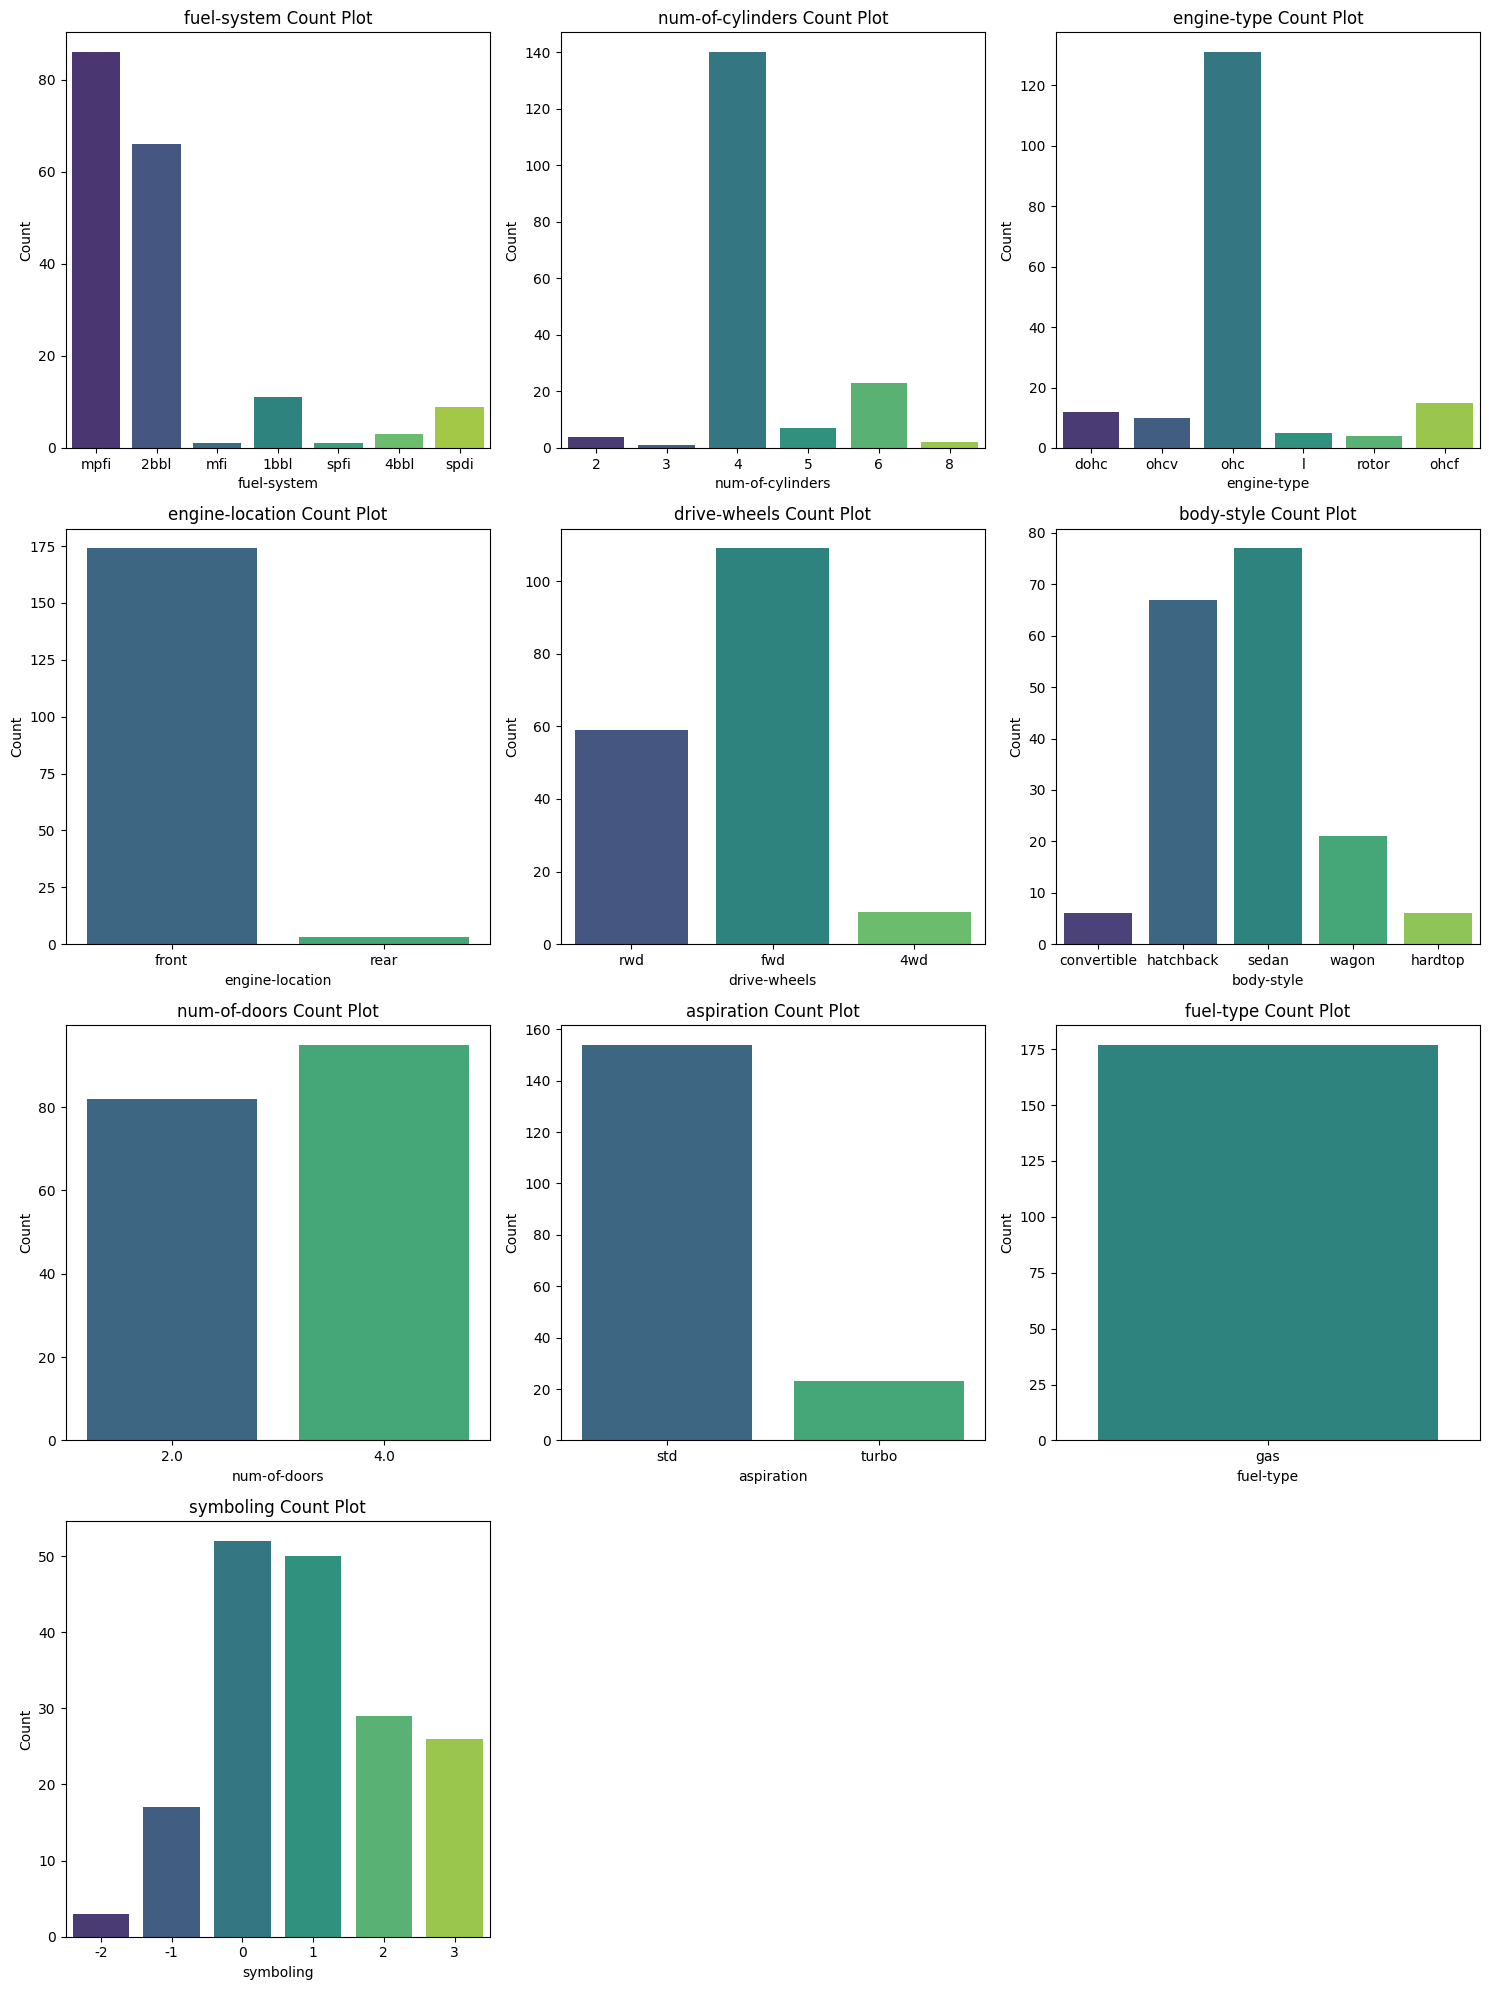

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features
categorical_features = ['fuel-system', 'num-of-cylinders', 'engine-type', 'engine-location', 'drive-wheels', 'body-style', 'num-of-doors', 'aspiration', 'fuel-type', 'symboling']

num_rows = len(categorical_features) // 3 + (len(categorical_features) % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(x=df[feature], ax=axes[i], palette='viridis')
        axes[i].set_title(f'{feature} Count Plot')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

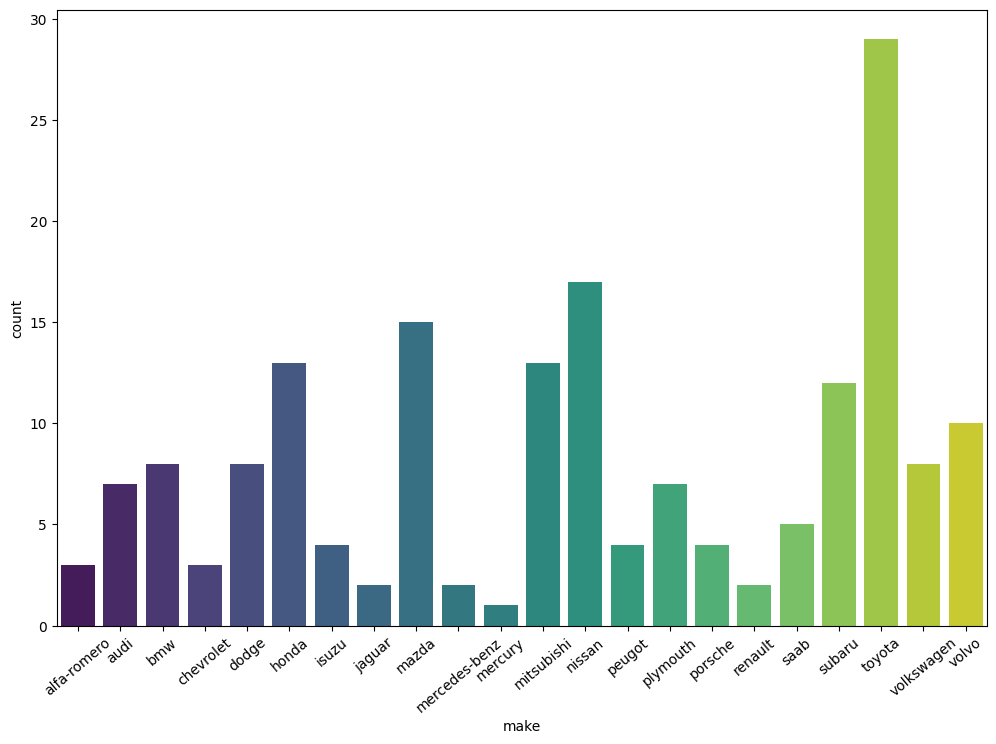

In [113]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['make'], palette='viridis')
plt.xticks(rotation=40)  
plt.show()

### Scatterplots of most correlated features

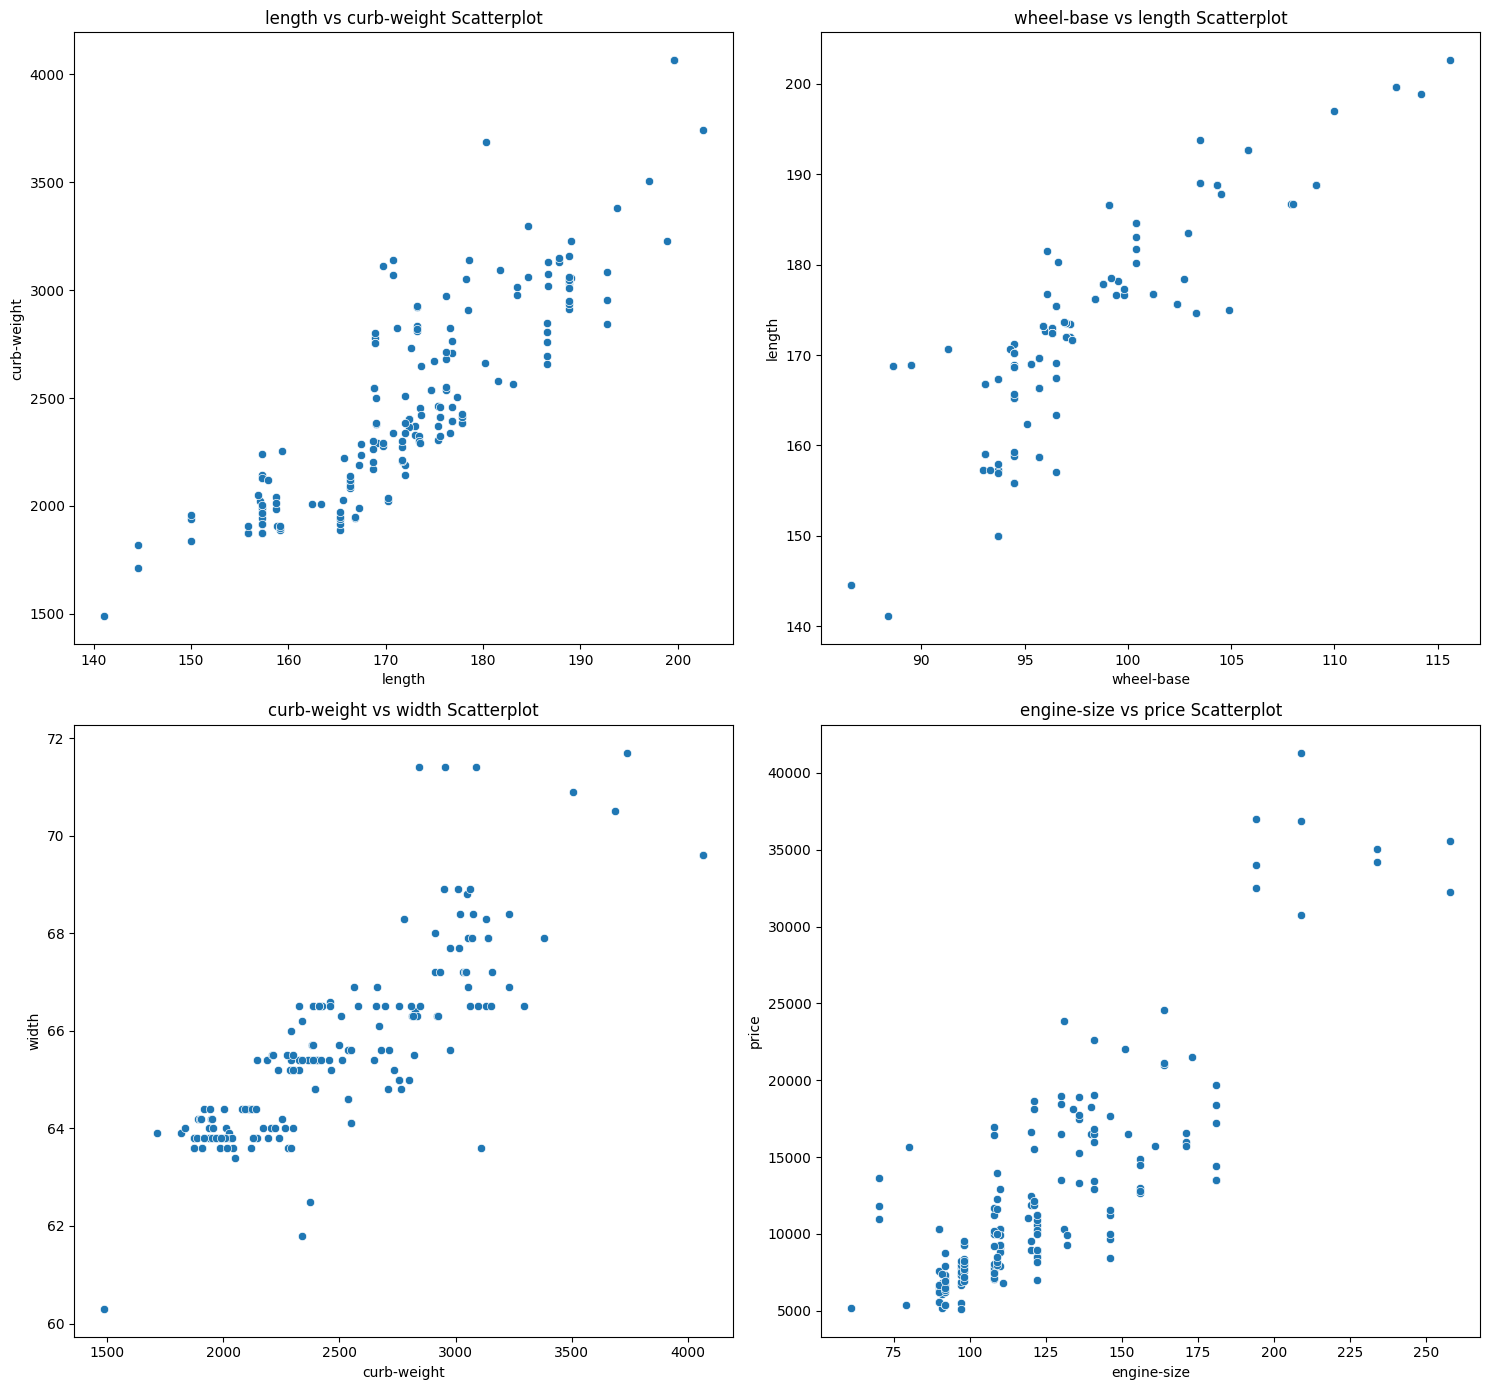

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

correlated_features_list = [
    ('length', 'curb-weight'),
    ('wheel-base', 'length'),
    ('curb-weight', 'width'),
    ('engine-size', 'price')
]
num_rows = len(correlated_features_list) // 2 + (len(correlated_features_list) % 2 > 0)

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 7 * num_rows))
axes = axes.flatten()

for i, (feature1, feature2) in enumerate(correlated_features_list):
    if i < len(axes):
        sns.scatterplot(x=df[feature1], y=df[feature2], ax=axes[i])
        axes[i].set_title(f'{feature1} vs {feature2} Scatterplot')
        axes[i].set_xlabel(feature1)
        axes[i].set_ylabel(feature2)

for j in range(len(correlated_features_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Classification methods

In [115]:
all_features = ['highway-mpg','peak-rpm', 'horsepower',
                'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
                'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width', 'length',
                'wheel-base', 'engine-location', 'drive-wheels','body-style', 'num-of-doors',
                'aspiration', 'fuel-type', 'make', 'normalized-losses']
categorical_features = ['fuel-system', 'num-of-cylinders', 'engine-type', 'engine-location', 'drive-wheels',
                        'body-style', 'num-of-doors', 'aspiration', 'fuel-type', 'symboling', 'make']
all_num_feat = [item for item in all_features if item not in categorical_features]
df_encoded = pd.get_dummies(df, columns=categorical_features)

### Because classification of price is a countinuous problem, we can make it discrete by creating three price bins.

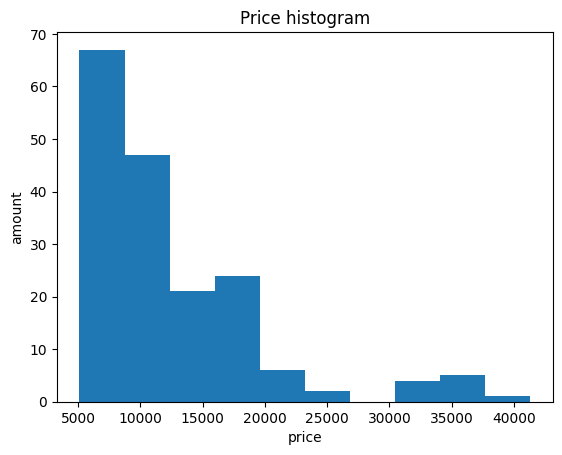

In [116]:
plt.hist(df['price'])
plt.title("Price histogram")
plt.xlabel("price")
plt.ylabel('amount')
plt.show()

#### Based on the histogram we decided to split the price into three bins:
- Low price < 10000,
- Medium price > 10000 and < 20000,
- High price > 20000

### Numerical vs categorical features

Due to the nature of the categorical features we decided not to use them in further analysis/classification as the there is  too much variance between each element in one feature. Of course only the numerical data was used instead.

### Test vs training data

In order for the model to learn we split our dataset using 8:2 ratio meaning that the model learns based on 80% of the data and than tries to predict the price based on the remaining 20%.

### Scalling the data

In [117]:
from sklearn.preprocessing import StandardScaler

# Assuming all_num_feat are your numeric features
numeric_features = df[all_num_feat]

# Create a StandardScaler
scaler = StandardScaler()


bins = [0, 10000, 20000, float('inf')]
labels = ['Low Price', 'Medium Price', 'High Price']
df.loc[:, 'price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

y = df['price_category']
X_numeric = df[all_num_feat]

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[all_num_feat])
X_test_scaled = scaler.transform(X_test[all_num_feat])


### Random forest




Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [118]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Results for Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(classification_rep_rf)


Results for Random Forest:
Accuracy: 0.7222
Classification Report:
              precision    recall  f1-score   support

  High Price       0.67      0.50      0.57         4
   Low Price       0.81      0.76      0.79        17
Medium Price       0.65      0.73      0.69        15

    accuracy                           0.72        36
   macro avg       0.71      0.67      0.68        36
weighted avg       0.73      0.72      0.72        36



#### As we can see if we include all the features from the datasat the classification accuracy is only 72.2%.

### K-nearest neighbours (KNN) 

k-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for both classification and regression tasks. In summary, KNN relies on the idea that similar items are close to each other in the feature space. It's a non-parametric, lazy learning algorithm, meaning it doesn't make assumptions about the underlying data distribution during training. KNN can be effective for simple classification tasks, but its performance may suffer in high-dimensional spaces or datasets with noisy or irrelevant features. The choice of the distance metric and the value of k are important considerations for the success of the algorithm.

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("Results for k-NN:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:")
print(classification_rep_knn)


Results for k-NN:
Accuracy: 0.7778
Classification Report:
              precision    recall  f1-score   support

  High Price       1.00      0.50      0.67         4
   Low Price       0.76      0.94      0.84        17
Medium Price       0.77      0.67      0.71        15

    accuracy                           0.78        36
   macro avg       0.84      0.70      0.74        36
weighted avg       0.79      0.78      0.77        36



In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

# Display results
print("Results for Logistic Regression:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print("Classification Report:")
print(classification_rep_logistic)


Results for Logistic Regression:
Accuracy: 0.8889
Classification Report:
              precision    recall  f1-score   support

  High Price       1.00      0.75      0.86         4
   Low Price       0.89      0.94      0.91        17
Medium Price       0.87      0.87      0.87        15

    accuracy                           0.89        36
   macro avg       0.92      0.85      0.88        36
weighted avg       0.89      0.89      0.89        36



In [121]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(random_state=42)

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Display results
print("Results for Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:")
print(classification_rep_svm)


Results for Support Vector Machine (SVM):
Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

  High Price       1.00      0.50      0.67         4
   Low Price       0.78      0.82      0.80        17
Medium Price       0.69      0.73      0.71        15

    accuracy                           0.75        36
   macro avg       0.82      0.69      0.73        36
weighted avg       0.76      0.75      0.75        36



In [122]:
from sklearn.neural_network import MLPClassifier

# Create a Neural Network model
nn_model = MLPClassifier(random_state=42)

# Fit the model to the training data
nn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the Neural Network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
classification_rep_nn = classification_report(y_test, y_pred_nn)

# Display results
print("Results for Neural Network:")
print(f"Accuracy: {accuracy_nn:.4f}")
print("Classification Report:")
print(classification_rep_nn)


Results for Neural Network:
Accuracy: 0.7778
Classification Report:
              precision    recall  f1-score   support

  High Price       0.50      0.25      0.33         4
   Low Price       0.84      0.94      0.89        17
Medium Price       0.73      0.73      0.73        15

    accuracy                           0.78        36
   macro avg       0.69      0.64      0.65        36
weighted avg       0.76      0.78      0.76        36



c:\users\bjbmw\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [123]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Display results
print("Results for Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_nb:.4f}")
print("Classification Report:")
print(classification_rep_nb)


Results for Naive Bayes Classifier:
Accuracy: 0.8333
Classification Report:
              precision    recall  f1-score   support

  High Price       1.00      0.75      0.86         4
   Low Price       0.80      0.94      0.86        17
Medium Price       0.85      0.73      0.79        15

    accuracy                           0.83        36
   macro avg       0.88      0.81      0.84        36
weighted avg       0.84      0.83      0.83        36



In [124]:
from sklearn.ensemble import ExtraTreesClassifier

# Create a Random Trees model
rt_model = ExtraTreesClassifier(random_state=42)

# Fit the model to the training data
rt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rt = rt_model.predict(X_test_scaled)

# Evaluate the Random Trees model
accuracy_rt = accuracy_score(y_test, y_pred_rt)
classification_rep_rt = classification_report(y_test, y_pred_rt)

# Display results
print("Results for Random Trees:")
print(f"Accuracy: {accuracy_rt:.4f}")
print("Classification Report:")
print(classification_rep_rt)


Results for Random Trees:
Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

  High Price       0.67      0.50      0.57         4
   Low Price       0.79      0.88      0.83        17
Medium Price       0.71      0.67      0.69        15

    accuracy                           0.75        36
   macro avg       0.72      0.68      0.70        36
weighted avg       0.74      0.75      0.74        36



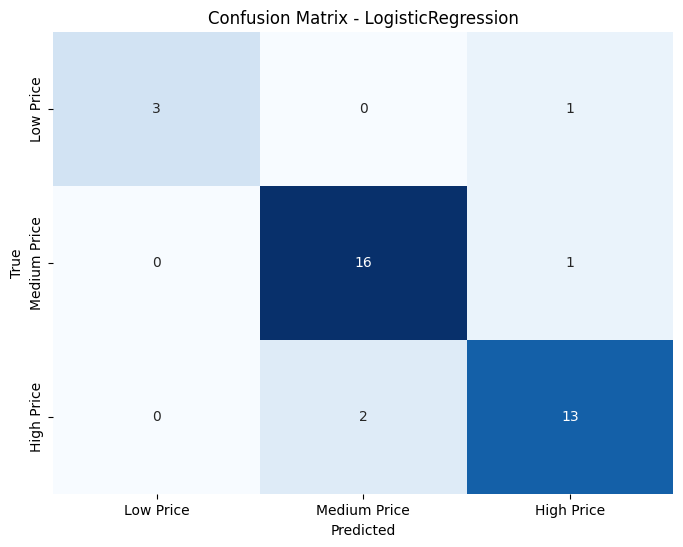

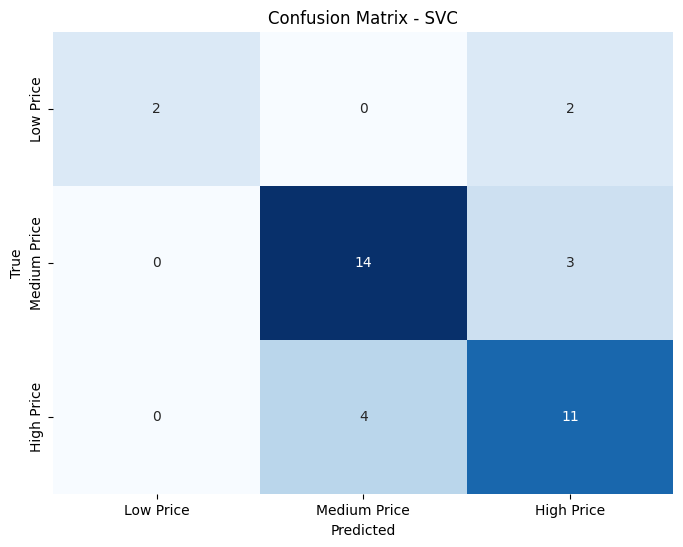

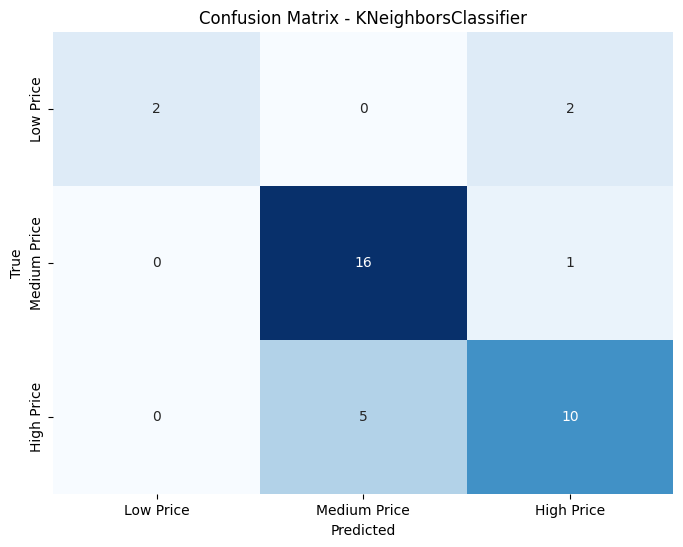

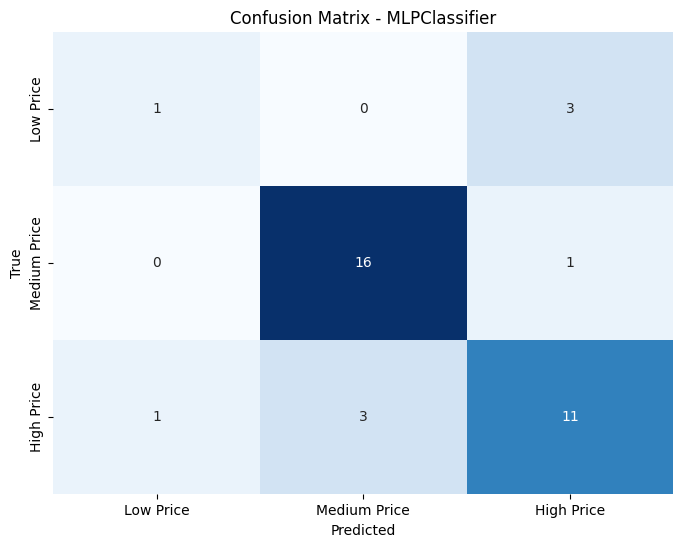

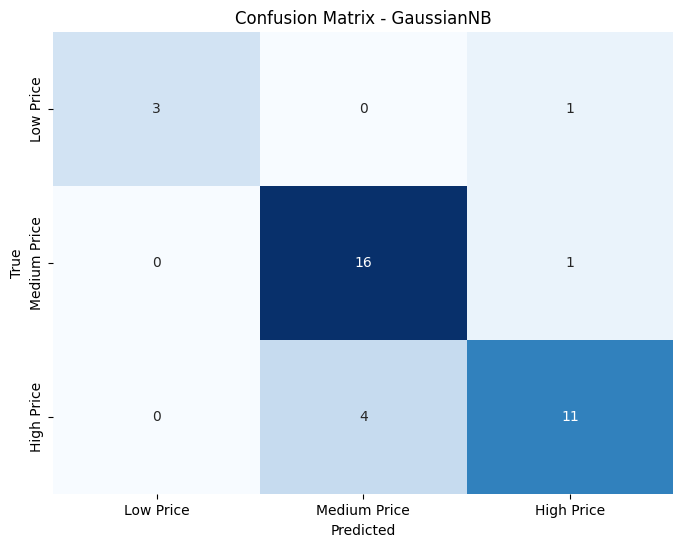

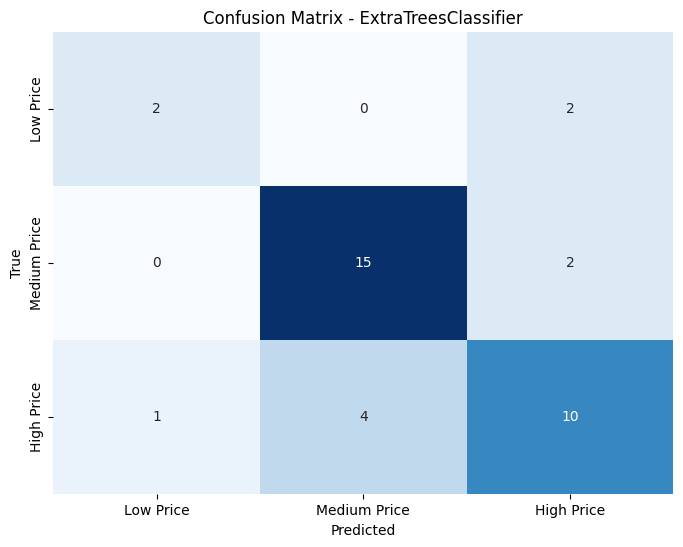

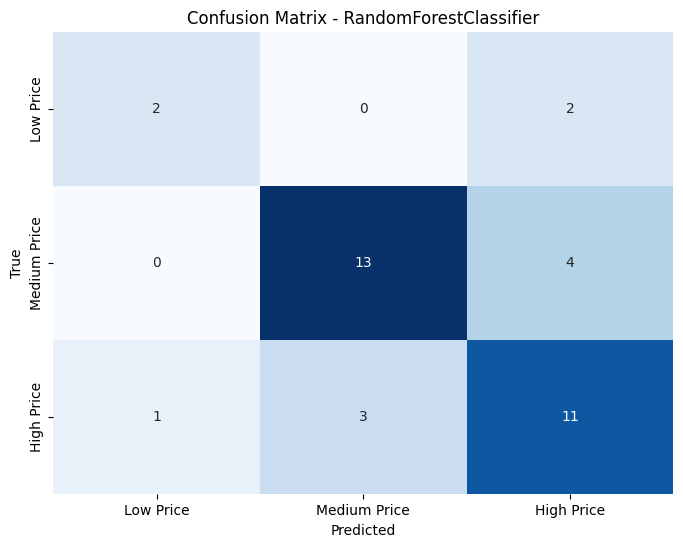

Accuracy Comparison:
LogisticRegression: 0.8889
SVC: 0.7500
KNeighborsClassifier: 0.7778
MLPClassifier: 0.7778
GaussianNB: 0.8333
ExtraTreesClassifier: 0.7500
RandomForestClassifier: 0.7222


In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of models
models = [logistic_model, svm_model, knn, nn_model, nb_model, rt_model, rf_model]

# Create empty dictionaries to store results
accuracy_dict = {}
classification_report_dict = {}

# Loop through models
for model in models:
    # Get model name
    model_name = type(model).__name__
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[model_name] = accuracy
    
    # Generate classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)
    classification_report_dict[model_name] = class_report
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Display accuracy comparison
print("Accuracy Comparison:")
for model_name, accuracy in accuracy_dict.items():
    print(f"{model_name}: {accuracy:.4f}")


In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters for tuning
logreg_params = {'C': [0.01, 0.1, 1]}

# Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Perform GridSearchCV for parameter tuning
logreg_grid = GridSearchCV(logreg_model, param_grid=logreg_params, scoring='accuracy', cv=5)
logreg_grid.fit(X_train_scaled, y_train)

# Display best parameters
print("Best Parameters for Logistic Regression:", logreg_grid.best_params_)



Best Parameters for Logistic Regression: {'C': 0.1}


In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
svm_params = {'C': [0.01, 0.1, 1],
               'kernel': ['linear', 'rbf', 'poly'],
               'gamma': ['scale', 'auto']}

# Create SVM model
svm_model = SVC(random_state=42)

# Perform GridSearchCV for parameter tuning
svm_grid = GridSearchCV(svm_model, param_grid=svm_params, scoring='accuracy', cv=5)
svm_grid.fit(X_train_scaled, y_train)

# Display best parameters
print("Best Parameters for SVM:", svm_grid.best_params_)


Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [69]:
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameters for tuning
knn_params = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Create KNN model
knn_model = KNeighborsClassifier()

# Perform GridSearchCV for parameter tuning
knn_grid = GridSearchCV(knn_model, param_grid=knn_params, scoring='accuracy', cv=5)
knn_grid.fit(X_train_scaled, y_train)

# Display best parameters
print("Best Parameters for KNN:", knn_grid.best_params_)


Best Parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [71]:
from sklearn.neural_network import MLPClassifier

# Define hyperparameters for tuning
nn_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
             'activation': ['relu', 'logistic'],
             'solver': ['adam', 'sgd'],
             'alpha': [0.0001, 0.001, 0.01],
             'max_iter': [3000]}

# Create Neural Network model
nn_model = MLPClassifier(random_state=42)

# Perform GridSearchCV for parameter tuning
nn_grid = GridSearchCV(nn_model, param_grid=nn_params, scoring='accuracy', cv=5)
nn_grid.fit(X_train_scaled, y_train)

# Display best parameters
print("Best Parameters for Neural Network:", nn_grid.best_params_)


Best Parameters for Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 3000, 'solver': 'adam'}


In [72]:
from sklearn.ensemble import ExtraTreesClassifier

# Define hyperparameters for tuning
rt_params = {'n_estimators': [50, 100, 150],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

# Create Random Trees model
rt_model = ExtraTreesClassifier(random_state=42)

# Perform GridSearchCV for parameter tuning
rt_grid = GridSearchCV(rt_model, param_grid=rt_params, scoring='accuracy', cv=5)
rt_grid.fit(X_train_scaled, y_train)

# Display best parameters
print("Best Parameters for Random Trees:", rt_grid.best_params_)


Best Parameters for Random Trees: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [75]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters for tuning
rf_params = {'n_estimators': [50, 100, 150],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for parameter tuning
rf_grid = GridSearchCV(rf_model, param_grid=rf_params, scoring='accuracy', cv=5)
rf_grid.fit(X_train_scaled, y_train)

# Display best parameters
print("Best Parameters for Random Forest:", rf_grid.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [97]:
# List of best models with their tuned parameters
best_logistic = LogisticRegression()
best_svm = SVC(C=1, gamma='scale', kernel='rbf')
best_knn = KNeighborsClassifier()
best_nn = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), max_iter=3000, solver='adam')
best_random_trees = ExtraTreesClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2)
best_random_forest = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150)

# List of models and their names
models = [best_logistic, best_svm, best_knn, best_nn, best_random_trees, best_random_forest]
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Neural Network', 'Random Trees', 'Random Forest']

# Function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Function to compare models
def compare_models(models, model_names):
    accuracies = []
    for model, name in zip(models, model_names):
        # Fit the model with tuned parameters on the training data
        model.fit(X_train_scaled, y_train)
        
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Display Accuracy Comparison
    for name, acc in zip(model_names, accuracies):
        print(f"{name} Accuracy: {acc:.4f}")

# Compare models and display results
compare_models(models, model_names)

Logistic Regression Accuracy: 0.8889
SVM Accuracy: 0.7500
KNN Accuracy: 0.7778
Neural Network Accuracy: 0.8056
Random Trees Accuracy: 0.8056
Random Forest Accuracy: 0.7778
